In [239]:
import pandas as pd
import numpy as np
import tensorflow as tf
from scipy import misc
from tensorflow.python.framework import ops
import os

import matplotlib.pyplot as plt

%matplotlib inline

In [256]:
def reshape_image(a) :
    return a.reshape((a.shape[0]*a.shape[1]*a.shape[2],-1))


def read_data(path) :
    dataX = []
    dataY = []
    for signs in os.listdir(path) :
        path_ext = path+"\\"+signs
        temp = [reshape_image(misc.imread(path_ext+"\\"+i)) for i in os.listdir(path_ext)]
        dataX.append(np.hstack(temp))
        dataY.append(np.repeat(signs,len(temp)))

    return np.hstack(dataX),np.hstack(dataY)

In [257]:
x_train, y_train = read_data(r"C:\Users\jbw738\ALL_python_notebooks\DL_tutorial\Sign-Language-Digits-Dataset-master\Dataset")

In [258]:
np.unique(y_train)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [259]:
x_train = (x_train - np.mean(x_train))/np.std(x_train)

In [260]:
def one_hot(y_train):
    return tf.one_hot(y_train,depth=10)

In [261]:
with tf.Session() as ssn :
    y_train = ssn.run(one_hot(y_train))

y_train = y_train.T

In [262]:
x_train.shape

(30000, 2059)

In [263]:
y_train.shape

(10, 2059)

In [264]:
def placeholders_init(n_x,n_y) :
    X = tf.placeholder(tf.float32,[n_x,None])
    Y = tf.placeholder(tf.float32,[n_y,None])
    
    return X,Y
    

In [265]:
def initialize_parameters() :
    
    W1 = tf.get_variable("W1",shape=[50,30000],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",shape=[50,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2",shape=[25,50],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2",shape=[25,1],initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3",shape=[10,25],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3",shape=[10,1],initializer=tf.zeros_initializer())
    
    parameters = { "W1" :W1,
                   "b1" : b1,
                  "W2" :W2,
                  "b2" :b2,
                  "W3" :W3,
                  "b3" :b3
    }
    
    return parameters
    

In [266]:
def forward_prop(X,Y,parameters) :
    
    Z1 = tf.add(tf.matmul(parameters["W1"],X),parameters["b1"])
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(parameters["W2"],A1),parameters["b2"])
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(parameters["W3"],A2),parameters["b3"])
    
    return Z3
    

In [267]:
tf.reset_default_graph()

with tf.Session() as ssn :
    X, Y = placeholders_init(30000, 10)
    param = initialize_parameters()
    Z3  = forward_prop(X,Y,param)
    print("Z3 = " + str(Z3))
    

Z3 = Tensor("Add_2:0", shape=(10, ?), dtype=float32)


In [268]:
def compute_cost(Z3,Y) :
    
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels,logits=logits))
    
    return cost

In [269]:
tf.reset_default_graph()

with tf.Session() as ssn :
    X, Y = placeholders_init(30000, 10)
    param = initialize_parameters()
    Z3  = forward_prop(X,Y,param)
    cost = compute_cost(Z3,Y)
    print("cost = " + str(cost))
    

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [277]:
def model(X_train,Y_train,learning_rate = 0.0001,num_epochs = 1000) :
    
    ops.reset_default_graph() 
    (n_x,m) = X_train.shape
    n_y  = Y_train.shape[0]
    
    X,Y = placeholders_init(n_x,n_y)
    
    parameters = initialize_parameters()
    
    Z3 = forward_prop(X,Y,parameters)
    
    cost = compute_cost(Z3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,epsilon=0.001).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess :
        
        sess.run(init)
        costs = []
        
        for epoch in range(num_epochs) :
            epoch_cost = 0.
            
            _,epoch_cost = sess.run([optimizer,cost],feed_dict={X:X_train,Y:Y_train})
            
            if  epoch % 10 == 0 :
                print("Cost after epochs %i : %f"%(epoch,epoch_cost))
            if epoch % 10 == 0 :
                costs.append(epoch_cost)
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        correct_predictions = tf.equal(tf.argmax(Z3),tf.argmax(Y))
        
        accuracy = tf.reduce_mean(tf.cast(correct_predictions,"float"))
        
        print("Training Accuracy:", accuracy.eval({X:X_train,Y:Y_train}))
        #print("Test Accuracy:", accuracy.eval({X:X_test,Y:Y_test}))
        
        
    return parameters
    
    
        
        

Cost after epochs 0 : 2.584512
Cost after epochs 10 : 1.982032
Cost after epochs 20 : 1.597576
Cost after epochs 30 : 1.211046
Cost after epochs 40 : 0.919465
Cost after epochs 50 : 0.702808
Cost after epochs 60 : 0.549815
Cost after epochs 70 : 0.440989
Cost after epochs 80 : 0.360860
Cost after epochs 90 : 0.299651
Cost after epochs 100 : 0.251583
Cost after epochs 110 : 0.213536
Cost after epochs 120 : 0.183109
Cost after epochs 130 : 0.158266
Cost after epochs 140 : 0.137775
Cost after epochs 150 : 0.120868
Cost after epochs 160 : 0.106847
Cost after epochs 170 : 0.095157
Cost after epochs 180 : 0.085309
Cost after epochs 190 : 0.076926
Cost after epochs 200 : 0.069721
Cost after epochs 210 : 0.063492
Cost after epochs 220 : 0.058061
Cost after epochs 230 : 0.053293
Cost after epochs 240 : 0.049067
Cost after epochs 250 : 0.045307
Cost after epochs 260 : 0.041968
Cost after epochs 270 : 0.038987
Cost after epochs 280 : 0.036310
Cost after epochs 290 : 0.033892
Cost after epochs 300

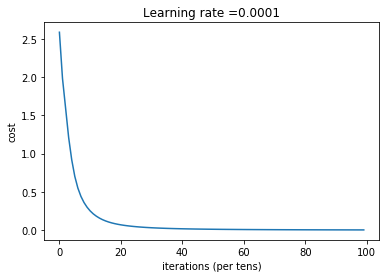

Training Accuracy: 1.0


In [278]:
tf.reset_default_graph()
parameters = model(x_train,y_train)